In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning
## Demo

In [4]:
pew = pd.read_csv('pew.csv')

In [8]:
pew_tidy = pew.melt(id_vars=['religion'], var_name='income', value_name='frequemcy')

In [10]:
pew_tidy.columns

Index(['religion', 'income', 'frequemcy'], dtype='object')

In [11]:
pew_tidy.dtypes

religion     object
income       object
frequemcy     int64
dtype: object

In [12]:
pew_tidy.religion = pew_tidy.religion.astype('category')
pew_tidy.income = pew_tidy.income.astype('category')

In [13]:
pew_tidy.dtypes

religion     category
income       category
frequemcy       int64
dtype: object

In [14]:
pew_tidy.memory_usage()

Index         132
religion      880
income        560
frequemcy    1440
dtype: int64

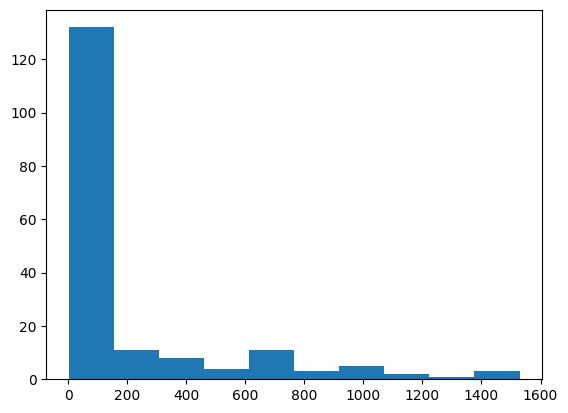

In [15]:
plt.hist(pew_tidy.frequemcy)
plt.show()

In [16]:
tb = pd.read_csv('tb.csv')

In [17]:
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [18]:
tb.shape

(5769, 22)

In [19]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [23]:
tb_tidy = tb.melt(id_vars=['iso2', 'year'], var_name='sex_and_age', value_name='cases')

In [24]:
tb_tidy.head()

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [29]:
tb_tidy.sex_and_age.unique()

array(['m04', 'm514', 'm014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564',
       'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534', 'f3544',
       'f4554', 'f5564', 'f65', 'fu'], dtype=object)

In [31]:
tb_tidy['gender'] = tb_tidy.sex_and_age.str.slice(0, 1)

In [32]:
tb_tidy['age_group'] = tb_tidy.sex_and_age.str.slice(1)

In [35]:
tb_tidy = tb_tidy.drop(columns=['sex_and_age'])

In [36]:
tb_tidy.describe().T

,count,mean,std,min,25%,50%,75%,max
year,115380.0,1994.229329,8.422571,1980.0,1987.0,1994.0,2002.0,2008.0
cases,35750.0,609.378881,3278.187960,0.0,4.0,36.0,245.0,90498.0


In [38]:
tb_tidy_no_missing = tb_tidy.dropna()

In [40]:
tb_tidy_no_missing

,iso2,year,cases,gender,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [41]:
tb_tidy_no_missing.cases.mean()

611.1249437443745

In [42]:
tb_tidy_no_missing[tb_tidy_no_missing.iso2 == 'BG'].cases.mean()

58.46478873239437

In [43]:
tb_tidy_no_missing.age_group.str.len().value_counts()

age_group
4    23912
2     5561
3     5536
1      543
Name: count, dtype: int64

In [47]:
tb_tidy_no_missing.age_group.apply(lambda x: x[0])

15        0
16        0
18        0
42        0
43        0
         ..
115195    u
115269    u
115323    u
115350    u
115379    u
Name: age_group, Length: 35552, dtype: object

In [48]:
def process_age_group(age_group):
    ages = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        # Put a dash before the last two digits
        return f"{age_group[:-2]}-{age_group[-2:]}"

In [50]:
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(process_age_group)

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\690891332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(process_age_group)


In [51]:
tb_tidy_no_missing.age_group.unique()

array(['0-4', '5-14', '0-14', '15-24', '25-34', '35-44', '45-54', '55-64',
       '65+', 'unknown'], dtype=object)

In [52]:
tb_tidy_no_missing.gender = tb_tidy_no_missing.gender.astype('category')
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.astype('category')

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\1597119304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.gender = tb_tidy_no_missing.gender.astype('category')
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\1597119304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.astype('category')


In [55]:
tb_tidy_no_missing = tb_tidy_no_missing[['iso2', 'year', 'gender', 'age_group', 'cases']]

In [57]:
tb_tidy_no_missing = tb_tidy_no_missing.sort_values(['iso2', 'year'])

In [60]:
tb_tidy_no_missing.cases = tb_tidy_no_missing.cases.astype(int)

In [61]:
tb_tidy_no_missing = tb_tidy_no_missing.reset_index(drop=True)

In [63]:
tb_tidy_no_missing

,iso2,year,gender,age_group,cases
0,AD,1996,m,0-14,0
1,AD,1996,m,15-24,0
2,AD,1996,m,25-34,0
3,AD,1996,m,35-44,4
4,AD,1996,m,45-54,1
...,...,...,...,...,...
35547,ZW,2008,f,35-44,2890
35548,ZW,2008,f,45-54,467
35549,ZW,2008,f,55-64,174
35550,ZW,2008,f,65+,105


In [64]:
tb_tidy_no_missing.to_csv("data/tb_ttb_tidy_no_missing.csv", index=None)

In [93]:
weater_data = pd.read_csv('weather.csv')

In [94]:
weater_data_tidy = weater_data.melt(id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='value')

In [95]:
weater_data_tidy.day = weater_data_tidy.day.str.slice(1).astype(int)

In [96]:
weater_data_tidy = weater_data_tidy.dropna()

In [97]:
weater_data_tidy.head()

,id,year,month,element,day,value
20,MX17004,2010,12,tmax,1,29.9
21,MX17004,2010,12,tmin,1,13.8
24,MX17004,2010,2,tmax,2,27.3
25,MX17004,2010,2,tmin,2,14.4
40,MX17004,2010,11,tmax,2,31.3


In [98]:
weater_data_tidy = weater_data_tidy.pivot_table(index=['id', 'day', 'year', 'month'], columns=['element'], values = 'value')

In [100]:
weater_data_tidy = weater_data_tidy.reset_index()

In [102]:
weater_data_tidy['date'] = pd.to_datetime(weater_data_tidy[['year', 'month', 'day']])

In [104]:
weater_data_tidy.head()

element,id,day,year,month,tmax,tmin,date
0,MX17004,1,2010,12,29.9,13.8,2010-12-01
1,MX17004,2,2010,2,27.3,14.4,2010-02-02
2,MX17004,2,2010,11,31.3,16.3,2010-11-02
3,MX17004,3,2010,2,24.1,14.4,2010-02-03
4,MX17004,3,2010,7,28.6,17.5,2010-07-03


In [105]:
billboard_data = pd.read_csv('billboard.csv')

In [106]:
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
billboard_data[billboard_data.columns[-15:]].describe().T

,count,mean,std,min,25%,50%,75%,max
wk62,2.0,44.5,3.535534,42.0,43.25,44.5,45.75,47.0
wk63,2.0,47.5,3.535534,45.0,46.25,47.5,48.75,50.0
wk64,2.0,50.0,0.000000,50.0,50.00,50.0,50.00,50.0
wk65,1.0,49.0,NaN,49.0,49.00,49.0,49.00,49.0
wk66,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk71,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
billboard_data[billboard_data.wk65.notna()]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
billboard_data = billboard_data.melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='position')

In [118]:
billboard_data = billboard_data.dropna()

In [122]:
billboard_data.week = billboard_data.week.str.slice(2).astype(int)

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\839362464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_data.week = billboard_data.week.str.slice(2).astype(int)


In [125]:
billboard_data.position = billboard_data.position.astype(int)

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\2900009451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_data.position = billboard_data.position.astype(int)


In [129]:
billboard_data['date.entered'] = pd.to_datetime(billboard_data['date.entered'])

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\3812476477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_data['date.entered'] = pd.to_datetime(billboard_data['date.entered'])


In [130]:
billboard_data.dtypes

year                     int64
artist                  object
track                   object
time                    object
date.entered    datetime64[ns]
week                     int32
position                 int32
dtype: object

In [132]:
pd.Timedelta(1, 'w')

Timedelta('7 days 00:00:00')

In [136]:
intervals = billboard_data.week.apply(lambda x: pd.Timedelta(x - 1, 'w'))

In [138]:
billboard_data['date'] = billboard_data['date.entered'] + intervals

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18076\3511268865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_data['date'] = billboard_data['date.entered'] + intervals


In [139]:
billboard_data

,year,artist,track,time,date.entered,week,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50,2000-08-19


In [140]:
billboard_data[billboard_data.track == 'Higher']

,year,artist,track,time,date.entered,week,position,date
62,2000,Creed,Higher,5:16,1999-09-11,1,81,1999-09-11
379,2000,Creed,Higher,5:16,1999-09-11,2,77,1999-09-18
696,2000,Creed,Higher,5:16,1999-09-11,3,73,1999-09-25
1013,2000,Creed,Higher,5:16,1999-09-11,4,63,1999-10-02
1330,2000,Creed,Higher,5:16,1999-09-11,5,61,1999-10-09
1647,2000,Creed,Higher,5:16,1999-09-11,6,58,1999-10-16
1964,2000,Creed,Higher,5:16,1999-09-11,7,56,1999-10-23
2281,2000,Creed,Higher,5:16,1999-09-11,8,52,1999-10-30
2598,2000,Creed,Higher,5:16,1999-09-11,9,56,1999-11-06
2915,2000,Creed,Higher,5:16,1999-09-11,10,57,1999-11-13


In [142]:
billboard_data = billboard_data.drop(columns=['date.entered', 'week'])

In [144]:
billboard_data = billboard_data[['year', 'artist', 'track', 'time', 'date', 'position']]

In [146]:
billboard_data[billboard_data.date.dt.year == 2001]

,year,artist,track,time,date,position
612,2000,Tuesday,I Know,4:06,2001-01-06,98
707,2000,De La Soul,All Good?,5:02,2001-01-06,100
1010,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-06,96
1327,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-13,99
1644,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-20,99
...,...,...,...,...,...,...
15218,2000,3 Doors Down,Kryptonite,3:53,2001-03-10,28
15535,2000,3 Doors Down,Kryptonite,3:53,2001-03-17,33
15852,2000,3 Doors Down,Kryptonite,3:53,2001-03-24,42
16169,2000,3 Doors Down,Kryptonite,3:53,2001-03-31,42


In [147]:
billboard_data.groupby('track').artist.value_counts()

track                    artist          
(Hot S**t) Country G...  Nelly               34
3 Little Words           Nu Flavor            9
911                      Jean, Wyclef        19
A Country Boy Can Su...  Brock, Chad          3
A Little Gasoline        Clark, Terri         6
                                             ..
You Won't Be Lonely ...  Cyrus, Billy Ray    13
You'll Always Be Lov...  Brooks & Dunn       19
You're A God             Vertical Horizon    21
Your Everything          Urban, Keith        16
www.memory               Jackson, Alan       15
Name: count, Length: 317, dtype: int64

In [148]:
billboard_data.groupby(['track', 'artist']).value_counts()

track                    artist         year  time  date        position
(Hot S**t) Country G...  Nelly          2000  4:17  2000-04-29  100         1
                                                    2000-05-06  99          1
                                                    2000-09-02  11          1
                                                    2000-08-26  11          1
                                                    2000-08-19  15          1
                                                                           ..
www.memory               Jackson, Alan  2000  2:36  2000-11-25  54          1
                                                    2000-11-18  59          1
                                                    2000-11-11  59          1
                                                    2000-11-04  75          1
                                                    2001-02-10  99          1
Name: count, Length: 5307, dtype: int64

In [150]:
billboard_data = billboard_data.reset_index()

In [154]:
billboard_data = billboard_data.drop(columns=['index'])

In [155]:
billboard_data[billboard_data.position == 1].artist.unique()

array(['Madonna', 'Aguilera, Christina', 'Sisqo', "Destiny's Child",
       'Santana', 'Carey, Mariah', 'Janet', 'Iglesias, Enrique', "N'Sync",
       'matchbox twenty', 'Aaliyah', 'Savage Garden', 'Vertical Horizon',
       'Creed', 'Lonestar'], dtype=object)

In [157]:
billboard_data[billboard_data.position == 1].artist.value_counts()

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64

In [158]:
weater_data_link = pd.read_csv('https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv')

In [159]:
weater_data_link

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [160]:
weater_data_link.shape

(366, 23)

In [163]:
weater_data_link.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [164]:
weater_data_link.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [165]:
weater_data_link.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                            "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                            "min_humidity", "max_pressure", "mean_pressure",
                            "min_pressure", "max_visibility", "mean_visibility",
                            "min_visibility", "max_wind", "mean_wind", "max_gusts",
                            "precipitation", "cloud_cover", "events", "wind_dir"
]

In [169]:
weater_data_link.date = pd.to_datetime(weater_data_link.date)

In [170]:
weater_data_link.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibility              int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
max_gusts                 float64
precipitation              object
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [171]:
weater_data_link.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [176]:
weater_data_link.loc[weater_data_link.precipitation == 'T', 'precipitation'] = 1e-6

In [177]:
weater_data_link.precipitation.unique()

array(['0.00', 1e-06, '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [179]:
weater_data_link.precipitation = weater_data_link.precipitation.astype(float)

In [180]:
weater_data_link.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [181]:
weater_data_link.events.value_counts(dropna=False)

events
NaN                           204
Rain                           69
Rain-Thunderstorm              26
Fog                            13
Snow                           13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Fog-Rain-Snow                   3
Rain-Snow                       3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: count, dtype: int64

<Axes: >

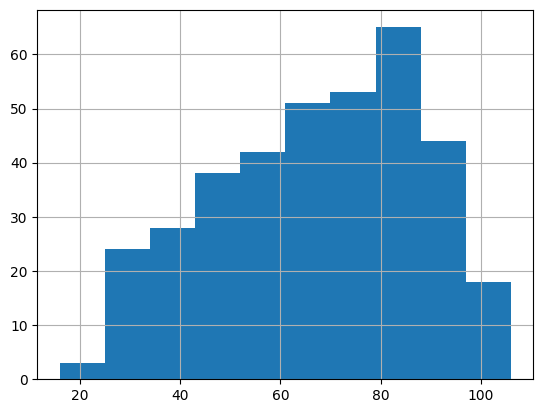

In [182]:
weater_data_link.max_temp.hist()

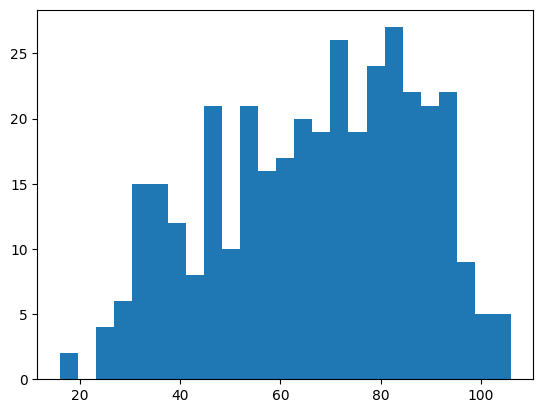

In [184]:
plt.hist(weater_data_link.max_temp, bins=25)
plt.show()

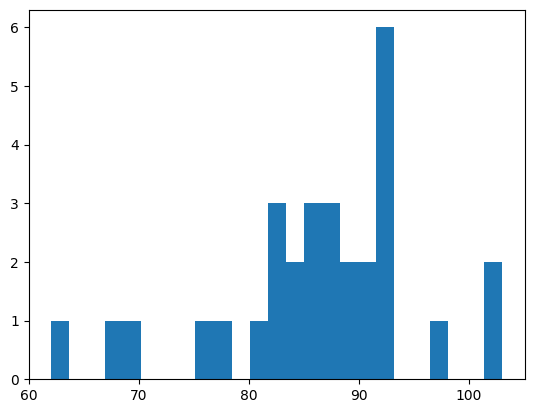

In [188]:
plt.hist(weater_data_link[weater_data_link.date.dt.month == 6].max_temp, bins=25)
plt.show()

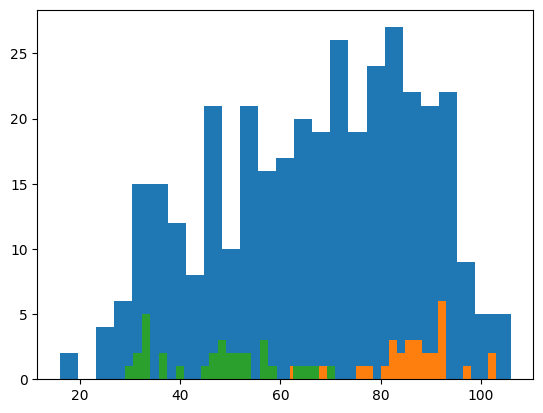

In [189]:
plt.hist(weater_data_link.max_temp, bins=25)
plt.hist(weater_data_link[weater_data_link.date.dt.month == 6].max_temp, bins=25)
plt.hist(weater_data_link[weater_data_link.date.dt.month == 12].max_temp, bins=25)

plt.show()

In [192]:
weater_data_link = weater_data_link.set_index('date')

In [195]:
weater_data_link.resample('w').min_temp.mean().head()

date
2012-03-11    27.000000
2012-03-18    51.714286
2012-03-25    54.857143
2012-04-01    46.714286
2012-04-08    45.571429
Freq: W-SUN, Name: min_temp, dtype: float64

In [197]:
weater_data_link.resample(pd.Timedelta(3, 'd')).min_temp.mean()

date
2012-03-10    35.666667
2012-03-13    50.666667
2012-03-16    52.333333
2012-03-19    58.000000
2012-03-22    52.666667
                ...    
2013-02-24    26.333333
2013-02-27    31.666667
2013-03-02    21.666667
2013-03-05    28.666667
2013-03-08    35.333333
Freq: 3D, Name: min_temp, Length: 122, dtype: float64

In [198]:
weater_data_link.rolling(pd.Timedelta(3, 'd')).min_temp.mean()

date
2012-03-10    24.000000
2012-03-11    27.000000
2012-03-12    35.666667
2012-03-13    44.333333
2012-03-14    49.000000
                ...    
2013-03-06    25.666667
2013-03-07    28.666667
2013-03-08    26.666667
2013-03-09    28.000000
2013-03-10    35.333333
Name: min_temp, Length: 366, dtype: float64

In [200]:
tb.fillna(-999) # sentinel value

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,AD,1990,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,AD,1991,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,AD,1992,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,AD,1993,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,-999.0,-999.0,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,-999.0,-999.0,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,-999.0
5765,ZW,2005,-999.0,-999.0,210.0,837.0,2264.0,1855.0,762.0,295.0,...,-999.0,-999.0,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,-999.0
5766,ZW,2006,-999.0,-999.0,215.0,736.0,2391.0,1939.0,896.0,348.0,...,-999.0,-999.0,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,-999.0
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,-999.0


In [202]:
# imputation
tb.fillna(0)

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AD,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AD,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AD,1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AD,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,0.0,0.0,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,0.0,0.0,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,0.0
5765,ZW,2005,0.0,0.0,210.0,837.0,2264.0,1855.0,762.0,295.0,...,0.0,0.0,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,0.0
5766,ZW,2006,0.0,0.0,215.0,736.0,2391.0,1939.0,896.0,348.0,...,0.0,0.0,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,0.0
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,0.0
